# Computational Geometry

Examples from Chapter 34 of <i>Scientific Computation for Hackers: Python and the Jupyter Shell</i>

GPL license. 

In [1]:
list((x**2 for x in range(5)))

[0, 1, 4, 9, 16]

In [2]:
class  point():
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __repr__(self):
        return str([self.x, self.y])
    
    def plot(self,size=15, color="k",off=0, n=""):
        plt.scatter(self.x, self.y,s=size, c=color)
        plt.annotate(xy=(self.x+off,self.y+off), s=n)
A=point(3,5)
A

[3, 5]

In [3]:
class lineseg():
    def __init__(self, p1, p2):
        if not isinstance(p1,point):
            print(p1, "is not a point - set to origin!")
            p1=point(0,0)
        if not isinstance(p2, point):
            print(p2, "is not a point - set to origin!")
            p2=point(0,0)
        self.point1=p1
        self.point2=p2
    def dx(self):
        return (self.point2.x - self.point1.x)
    def dy(self):
        return( self.point2.y - self.point1.y)
    def length(self):
        return (self.dx()**2 + self.dy()**2)**0.5
    def __repr__(self):
        return str([self.point1, self.point2])
B=point(12,-3)
L=lineseg(A,B)
L

[[3, 5], [12, -3]]

In [4]:
L=lineseg(5,12)
L

5 is not a point - set to origin!
12 is not a point - set to origin!


[[0, 0], [0, 0]]

In [5]:
L.length()

0.0

In [6]:
def SameSide(A,B,C,D):    
# Return True only if C and D are on the same side of AB
    AB=lineseg(A,B)
    AC=lineseg(A,C)
    AD=lineseg(A,D)
    M1 = (AC.dx() * AB.dy() - AB.dx()* AC.dy())
    M2 = (AD.dx() * AB.dy() - AB.dx()* AD.dy())
    return(M1*M2>0)

In [7]:
A=point(1,.5)
B=point(2, 1)
C=point(5, .1)
D=point(.1, 1)
E=point(2,.2)
SameSide(A,B,C,D), SameSide(A,B,C,E)

(False, True)

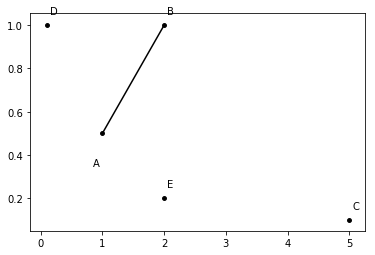

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
A.plot(n="A",off=-.15)
B.plot(n="B",off=.05)
C.plot(n="C",off=.05)
D.plot(n="D",off=.05)
E.plot(n="E",off=.05)
plt.plot([A.x,B.x],[A.y,B.y], c="k")

In [9]:
def OnLine(A, B, C):
    AB = lineseg(A, B)
    AC = lineseg(A, C)
    if abs(AC.dx()*AB.dy()-AB.dx()*AC.dy()) < 1.0E-10:
        return True
    return False

In [10]:
A=point(1,1)
B=point(2,2)
C=point(3,3)
D=point(3,4)
(OnLine(A,B,C),OnLine(A,B,D))

(True, False)

In [11]:
def Between(A, B, C):
    if C==A or C==B:  return True
    if OnLine(A, B, C):
        minx=min(A.x, B.x); maxx=max(A.x, B.x);
        miny=min(A.y, B.y); maxy=max(A.y, B.y);
        if (minx <= C.x <= maxx) and (miny <= C.y <= maxy):
            return True
    return False

In [12]:
(Between(A,B,C), Between(C,A,B), Between(B,A,D))

(False, True, False)

In [13]:
def LineIntersect(A, B, C, D):
    if not SameSide(A,B,C,D):
        return True
    elif not SameSide(C, D, A, B):
        return True
    else:
        return False
    return False
A=point(1,.5); B=point(2,1); C=point(5,.1); D=point(.1, 1)
LineIntersect(A,B,C,D)    

True

In [14]:
import numpy as np
def LineIntersectionPoint(A, B, C, D):
    if LineIntersect(A, B, C, D):
        D1=np.linalg.det( np.array([[C.x-A.x, C.x-D.x],
                                    [C.y-A.y, C.y-D.y]]))
        D2=np.linalg.det( np.array([[B.x-A.x, C.x-D.x],
                                    [B.y-A.y, C.y-D.y]]))
        t = D1/D2 if abs(D2)>1.0E-10 else 0  
        return point(A.x+t*(B.x-A.x), A.y+t*(B.y-A.y))  

In [15]:
def LineSegIntersect(A, B, C, D):
    if Between(A,B,C) or Between(A, B, D) or \
       Between(C, D, A) or Between(C,D,B):           
        return True
    elif LineIntersect(A, B, C, D):
       Q = LineIntersectionPoint(A, B, C, D)      
       if Between(A, B, Q) and Between(C, D, Q):
           return True
    return False
A=point(1,.5); B=point(2,1); C=point(5,.1);D=point(.1,1)
LineSegIntersect(A,B,C,D)

True

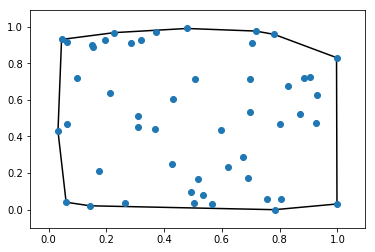

In [16]:
from scipy.spatial import *
import matplotlib.pyplot as plot
pts=np.random.rand(50,2) # generate 50 random points
H=ConvexHull(pts)
p=convex_hull_plot_2d(H);

In [17]:
H.vertices

array([ 8, 36, 43, 40,  1,  9, 34,  3, 37, 45, 44], dtype=int32)

In [18]:
pts[H.vertices]

array([[9.98719498e-01, 3.11795325e-02],
       [9.97169233e-01, 8.30402231e-01],
       [7.80830321e-01, 9.57543543e-01],
       [7.16831364e-01, 9.75461211e-01],
       [4.79075128e-01, 9.89497544e-01],
       [2.27916433e-01, 9.66837505e-01],
       [4.52395406e-02, 9.29618492e-01],
       [3.27891421e-02, 4.28757441e-01],
       [6.10244884e-02, 4.08528344e-02],
       [1.43114085e-01, 2.13276277e-02],
       [7.82921186e-01, 5.22176965e-05]])

In [19]:
H.simplices

array([[36,  8],
       [37,  3],
       [34,  3],
       [43, 36],
       [44,  8],
       [ 9,  1],
       [ 9, 34],
       [40,  1],
       [40, 43],
       [45, 37],
       [45, 44]], dtype=int32)

In [20]:
pts[H.simplices]

array([[[9.97169233e-01, 8.30402231e-01],
        [9.98719498e-01, 3.11795325e-02]],

       [[6.10244884e-02, 4.08528344e-02],
        [3.27891421e-02, 4.28757441e-01]],

       [[4.52395406e-02, 9.29618492e-01],
        [3.27891421e-02, 4.28757441e-01]],

       [[7.80830321e-01, 9.57543543e-01],
        [9.97169233e-01, 8.30402231e-01]],

       [[7.82921186e-01, 5.22176965e-05],
        [9.98719498e-01, 3.11795325e-02]],

       [[2.27916433e-01, 9.66837505e-01],
        [4.79075128e-01, 9.89497544e-01]],

       [[2.27916433e-01, 9.66837505e-01],
        [4.52395406e-02, 9.29618492e-01]],

       [[7.16831364e-01, 9.75461211e-01],
        [4.79075128e-01, 9.89497544e-01]],

       [[7.16831364e-01, 9.75461211e-01],
        [7.80830321e-01, 9.57543543e-01]],

       [[1.43114085e-01, 2.13276277e-02],
        [6.10244884e-02, 4.08528344e-02]],

       [[1.43114085e-01, 2.13276277e-02],
        [7.82921186e-01, 5.22176965e-05]]])

/usr/local/lib/python3.6/dist-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


[]

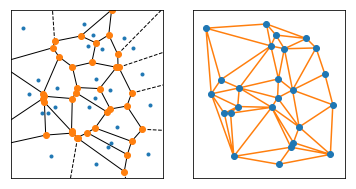

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import *
pts = np.random.rand(25,2) # generate random points
DT=Delaunay(pts)
# find the Delaunay triangulation
V=Voronoi(pts)
# find the Voronoi diagram
#---------------------------- all the rest is plotting
F,(axV,axD)=plt.subplots(nrows=1,ncols=2) # 2-column plot
#---------------------------- first plot
VP=voronoi_plot_2d(V,axV)
# Voronoi on left plot
axV.set_aspect("equal")
axV.set_xticks([])
# turn off tick marks
axV.set_yticks([])
#---------------------------- second plot
DP=delaunay_plot_2d(DT,axD) # Delaunay on right plot
axD.set_aspect("equal")
axD.set_xticks([])
axD.set_yticks([])

In [22]:
DT = Delaunay(pts)
DT.points[DT.simplices, :]

array([[[0.12008077, 0.52091207],
        [0.18456428, 0.61657415],
        [0.08437193, 0.96992659]],

       [[0.18456428, 0.61657415],
        [0.12008077, 0.52091207],
        [0.31183188, 0.56148482]],

       [[0.20973178, 0.38696171],
        [0.12008077, 0.52091207],
        [0.27445462, 0.09315814]],

       [[0.89670593, 0.65693052],
        [0.67604602, 0.54714569],
        [0.95150797, 0.44599648]],

       [[0.58139949, 0.03940164],
        [0.66496281, 0.1561101 ],
        [0.27445462, 0.09315814]],

       [[0.66496281, 0.1561101 ],
        [0.5335212 , 0.42882514],
        [0.27445462, 0.09315814]],

       [[0.66496281, 0.1561101 ],
        [0.58139949, 0.03940164],
        [0.93495182, 0.10669938]],

       [[0.5335212 , 0.42882514],
        [0.57348898, 0.49324538],
        [0.31183188, 0.56148482]],

       [[0.30124077, 0.43423724],
        [0.5335212 , 0.42882514],
        [0.31183188, 0.56148482]],

       [[0.12008077, 0.52091207],
        [0.30124077, 0.4342372

In [23]:
DT.neighbors

array([[25, -1,  1],
       [ 9, 21,  0],
       [-1, 26, 10],
       [12, -1, 15],
       [ 5, -1,  6],
       [28,  4, 32],
       [-1, 30,  4],
       [20,  8, 14],
       [ 7,  9, 29],
       [ 8,  1, 10],
       [ 9,  2, 27],
       [-1, 12, 31],
       [11,  3, 13],
       [12, 18, 14],
       [ 7, 33, 13],
       [16,  3, -1],
       [19, 15, 17],
       [-1, 37, 16],
       [13, 19, 20],
       [18, 16, 23],
       [22,  7, 18],
       [ 1, 22, 25],
       [21, 20, 23],
       [19, 35, 22],
       [-1, 25, 34],
       [24,  0, 21],
       [ 2, 28, 27],
       [10, 26, 29],
       [26,  5, 29],
       [28,  8, 27],
       [ 6, 31, 32],
       [30, 11, 33],
       [33,  5, 30],
       [14, 32, 31],
       [36, 24, 35],
       [23, 37, 34],
       [37, -1, 34],
       [17, 36, 35]], dtype=int32)

In [24]:
CH = ConvexHull(pts)
print(CH.points[CH.simplices, :])

[[[0.27445462 0.09315814]
  [0.58139949 0.03940164]]

 [[0.93495182 0.10669938]
  [0.95150797 0.44599648]]

 [[0.93495182 0.10669938]
  [0.58139949 0.03940164]]

 [[0.49765669 0.99855701]
  [0.08437193 0.96992659]]

 [[0.49765669 0.99855701]
  [0.77125173 0.89939288]]

 [[0.83671398 0.83477926]
  [0.77125173 0.89939288]]

 [[0.12008077 0.52091207]
  [0.08437193 0.96992659]]

 [[0.12008077 0.52091207]
  [0.27445462 0.09315814]]

 [[0.89670593 0.65693052]
  [0.95150797 0.44599648]]

 [[0.89670593 0.65693052]
  [0.83671398 0.83477926]]]


In [25]:
VD = Voronoi(pts)
print("Voronoi vertices=",VD.vertices[VD.ridge_vertices, :])

Voronoi vertices= [[[ 0.66802335  0.92396587]
  [ 0.45458133  0.21847343]]

 [[ 0.66802335  0.92396587]
  [ 0.77403239 -0.01025369]]

 [[ 0.45458133  0.21847343]
  [ 0.77403239 -0.01025369]]

 [[ 0.66802335  0.92396587]
  [-0.34931327  0.10977728]]

 [[ 0.66802335  0.92396587]
  [-0.08740609  0.73033841]]

 [[-0.08740609  0.73033841]
  [ 0.21974439  0.52329565]]

 [[ 0.21974439  0.52329565]
  [ 0.22366669  0.50475846]]

 [[-0.34931327  0.10977728]
  [ 0.21557696  0.48785004]]

 [[ 0.22366669  0.50475846]
  [ 0.21557696  0.48785004]]

 [[ 0.66802335  0.92396587]
  [ 0.73665035  0.70198317]]

 [[ 0.73665035  0.70198317]
  [ 0.73158592  0.70481209]]

 [[ 0.73158592  0.70481209]
  [ 0.72940073  0.7915244 ]]

 [[ 0.66802335  0.92396587]
  [ 0.72940073  0.7915244 ]]

 [[ 0.82442355  0.5255651 ]
  [ 0.73665035  0.70198317]]

 [[ 0.66802335  0.92396587]
  [ 0.82442355  0.5255651 ]]

 [[ 0.66802335  0.92396587]
  [ 0.89685627  0.27861075]]

 [[ 0.82442355  0.5255651 ]
  [ 0.7920831   0.43749161